In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from matplotlib import rcParams
from collections import Counter
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
rcParams['figure.figsize'] = 11, 8
plt.style.use('ggplot')

In [3]:
def get_data(path):
    return pd.read_json(path)
    
df = get_data('data.json')

<h3>Number of recipes per cuisine</h3>

Text(0.5, 1.0, 'Number of recipes per cuisine')

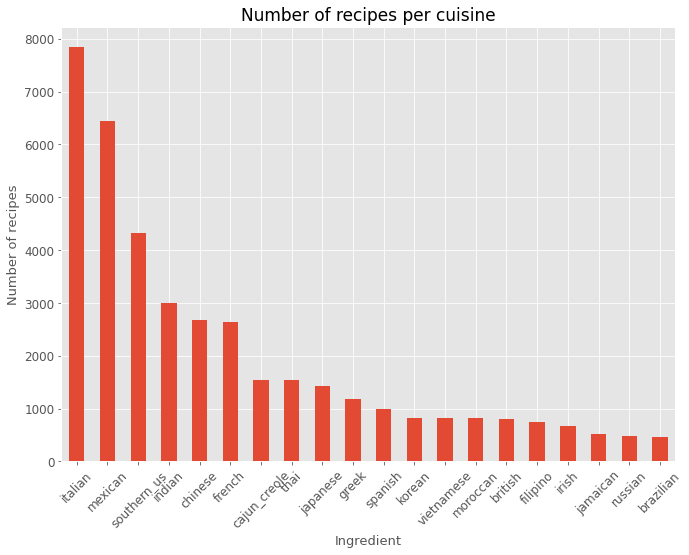

In [4]:
number_recipe_cuisine = df['cuisine'].value_counts()

ax = number_recipe_cuisine.plot(kind='bar', rot=45, fontsize=12)
ax.set_xlabel('Ingredient', fontsize=13)
ax.set_ylabel('Number of recipes', fontsize=13)
ax.set_title('Number of recipes per cuisine', fontsize=17)

<h3>The most frequent ingredients for each cuisine</h3>

In [5]:
counters = {}
for cuisine in df['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (df['cuisine'] == cuisine)
    for ingredients in df[indices]['ingredients']:
        counters[cuisine].update(ingredients)
        
counters['italian'].most_common(10)

[('salt', 3454),
 ('olive oil', 3111),
 ('garlic cloves', 1619),
 ('grated parmesan cheese', 1580),
 ('garlic', 1471),
 ('ground black pepper', 1444),
 ('extra-virgin olive oil', 1362),
 ('onions', 1240),
 ('water', 1052),
 ('butter', 1030)]

 <h3>Top 10 ingredients for each cuisine</h3>

In [6]:
top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 11)])
top10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter,milk,buttermilk
filipino,salt,garlic,water,onions,soy sauce,pepper,oil,sugar,carrots,ground black pepper
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil
jamaican,salt,onions,water,garlic,ground allspice,pepper,scallions,dried thyme,black pepper,garlic cloves
spanish,salt,olive oil,garlic cloves,extra-virgin olive oil,onions,water,tomatoes,ground black pepper,red bell pepper,pepper
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic,ground black pepper,extra-virgin olive oil,onions,water,butter
mexican,salt,onions,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onions,vegetable oil,scallions
british,salt,all-purpose flour,butter,milk,eggs,unsalted butter,sugar,onions,baking powder,large eggs


<h3>Histogram of recipe size</h3>

Text(0.5, 1.0, 'Histogram of recipe size')

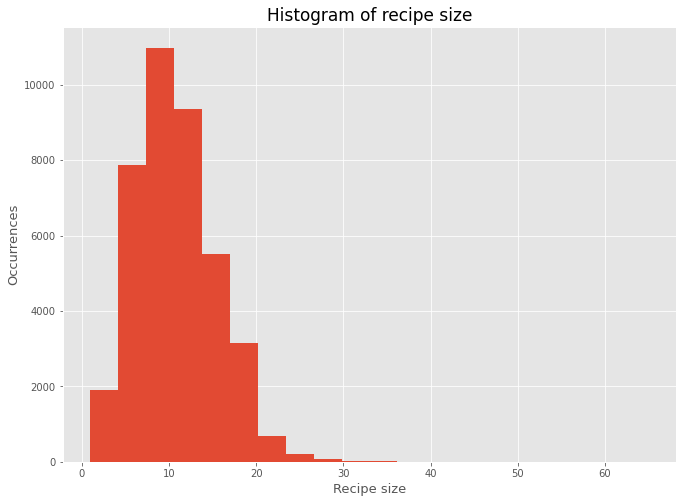

In [7]:
size_recipe = df['ingredients'].apply(len)

ax = size_recipe.hist(bins=20)
ax.set_xlabel('Recipe size', fontsize=13)
ax.set_ylabel('Occurrences', fontsize=13)
ax.set_title('Histogram of recipe size', fontsize=17)

In [8]:
df['all_ingredients'] = df['ingredients'].map(";".join)
df.head()

,id,cuisine,ingredients,all_ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce;black olives;grape tomatoes;ga...
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour;ground pepper;salt;tomatoes;ground...
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs;pepper;salt;mayonaise;cooking oil;green c...
3,22213,indian,"[water, vegetable oil, wheat, salt]",water;vegetable oil;wheat;salt
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",black pepper;shallots;cornflour;cayenne pepper...


<h3>Group the recipes by the presence of an ingredient</h3>

<AxesSubplot:title={'center':'garlic cloves as found per cuisine'}>

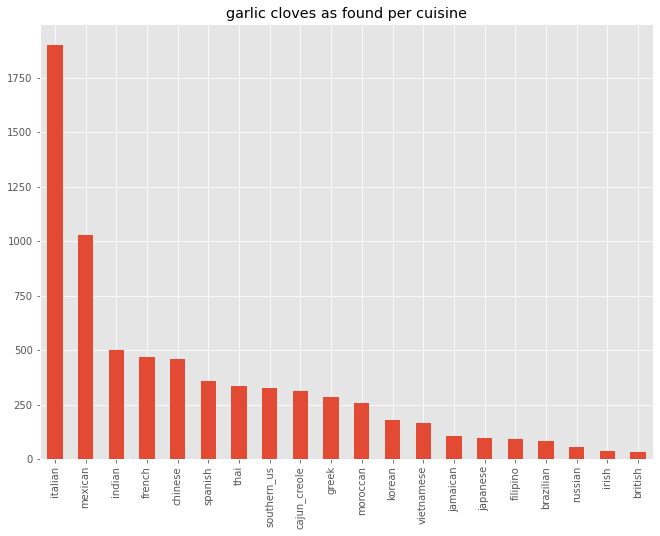

In [9]:
indices = df['all_ingredients'].str.contains('garlic cloves')
df[indices]['cuisine'].value_counts().plot(kind='bar', title='garlic cloves as found per cuisine')

<AxesSubplot:>

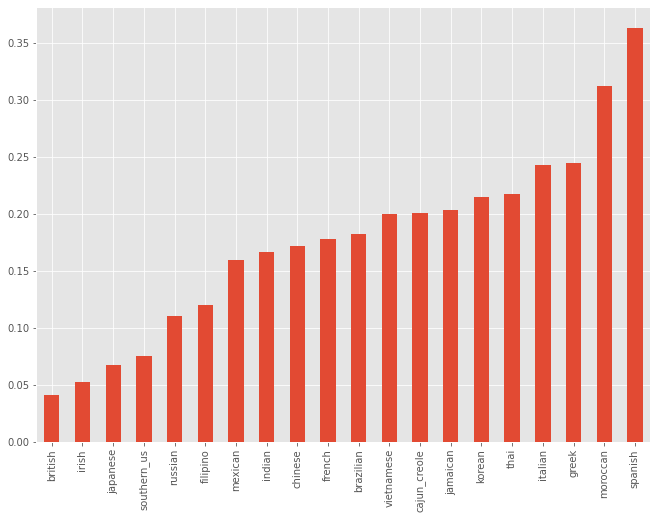

In [10]:
relative_freq = (df[indices]['cuisine'].value_counts() / df['cuisine'].value_counts())
relative_freq.sort_values(inplace=True)
relative_freq.plot(kind='bar')

In [11]:
unique = np.unique(top10.values.ravel())
unique

array(['all-purpose flour', 'avocado', 'baking powder', 'baking soda',
       'black pepper', 'butter', 'buttermilk', 'cachaca',
       'cajun seasoning', 'carrots', 'cayenne pepper', 'chili powder',
       'coconut milk', 'corn starch', 'corn tortillas', 'cumin seed',
       'dried oregano', 'dried thyme', 'eggs', 'extra-virgin olive oil',
       'feta cheese crumbles', 'fish sauce', 'fresh lemon juice',
       'fresh lime juice', 'garam masala', 'garlic', 'garlic cloves',
       'ginger', 'grated parmesan cheese', 'green bell pepper',
       'green onions', 'ground allspice', 'ground black pepper',
       'ground cinnamon', 'ground cumin', 'ground ginger',
       'ground turmeric', 'jalapeno chilies', 'large eggs', 'lime',
       'milk', 'mirin', 'oil', 'olive oil', 'onions', 'paprika', 'pepper',
       'potatoes', 'red bell pepper', 'rice vinegar', 'sake', 'salt',
       'scallions', 'sesame oil', 'sesame seeds', 'shallots',
       'sour cream', 'soy sauce', 'sugar', 'tomatoes', 'un

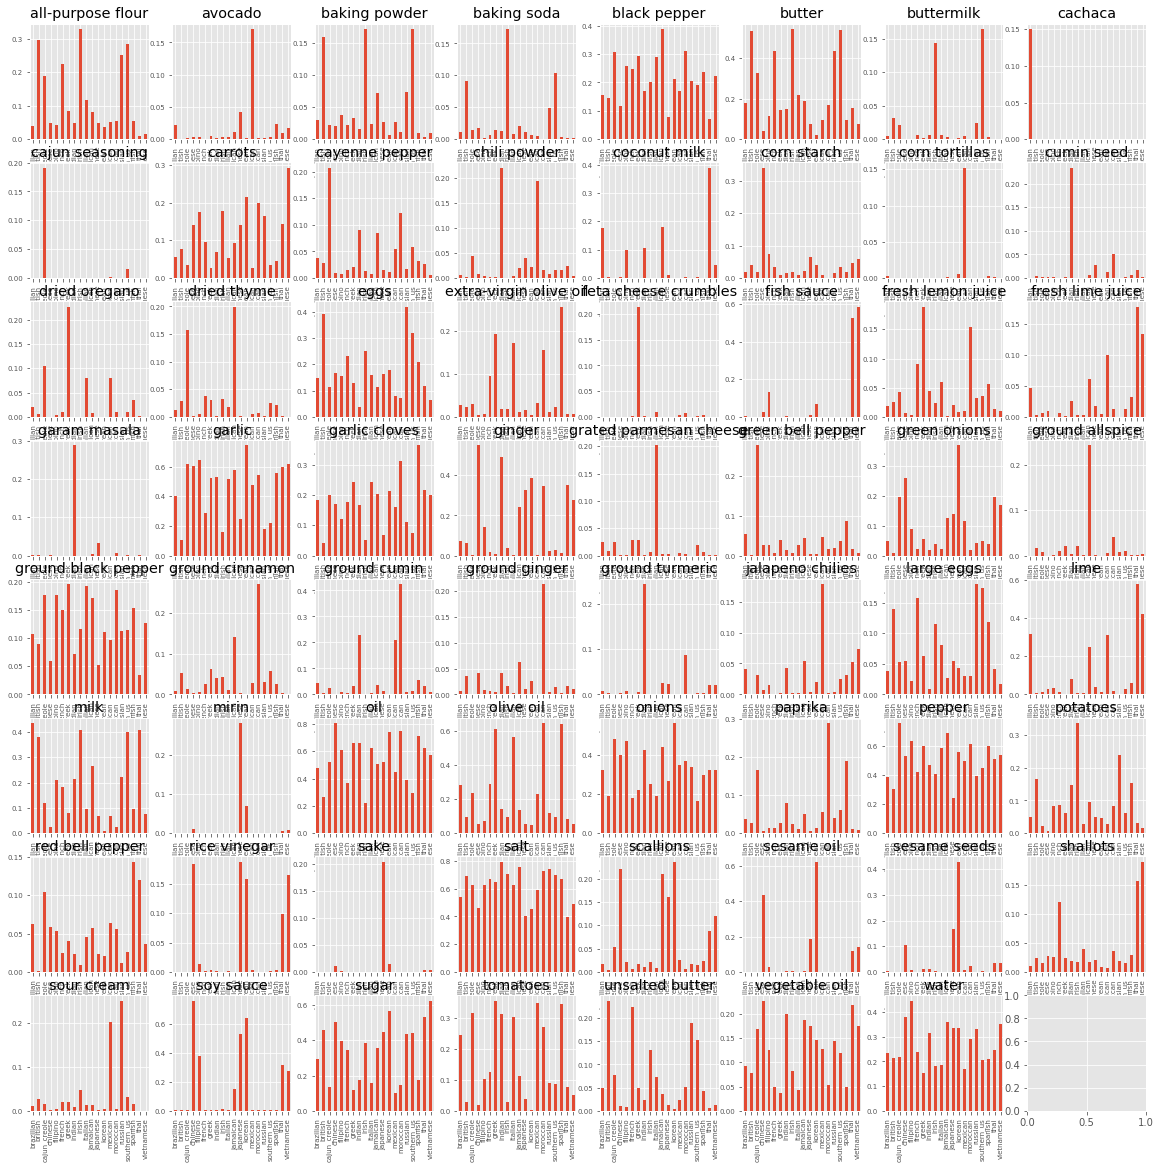

In [12]:
fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for ingredient, ax_index in zip(unique, range(64)):
    indices = df['all_ingredients'].str.contains(ingredient)
    relative_freq = (df[indices]['cuisine'].value_counts() / df['cuisine'].value_counts())
    relative_freq.plot(kind='bar', ax=axes.ravel()[ax_index], fontsize=7, title=ingredient)

<h3>Training</h3>

In [13]:
cv = CountVectorizer()
x = cv.fit_transform(df['all_ingredients'].values)

In [14]:
print(list(cv.vocabulary_.keys())[:100])

['romaine', 'lettuce', 'black', 'olives', 'grape', 'tomatoes', 'garlic', 'pepper', 'purple', 'onion', 'seasoning', 'garbanzo', 'beans', 'feta', 'cheese', 'crumbles', 'plain', 'flour', 'ground', 'salt', 'thyme', 'eggs', 'green', 'yellow', 'corn', 'meal', 'milk', 'vegetable', 'oil', 'mayonaise', 'cooking', 'chilies', 'grilled', 'chicken', 'breasts', 'powder', 'soy', 'sauce', 'butter', 'livers', 'water', 'wheat', 'shallots', 'cornflour', 'cayenne', 'onions', 'paste', 'lemon', 'juice', 'chili', 'passata', 'cumin', 'boneless', 'skinless', 'thigh', 'garam', 'masala', 'double', 'cream', 'natural', 'yogurt', 'bay', 'leaf', 'sugar', 'fresh', 'ginger', 'root', 'cinnamon', 'vanilla', 'extract', 'powdered', 'baking', 'olive', 'medium', 'shrimp', 'chopped', 'cilantro', 'jalapeno', 'flat', 'parsley', 'skirt', 'steak', 'white', 'vinegar', 'sea', 'chorizo', 'sausage', 'pistachio', 'nuts', 'almond', 'bark', 'dried', 'cranberries', 'pineapple', 'pork', 'poblano', 'peppers', 'tortillas', 'cheddar', 'iceb

In [15]:
clf = TruncatedSVD(1000)
x_pca = clf.fit_transform(x)
x_pca

array([[ 1.29773603e+00, -6.43500367e-01, -6.29700114e-01, ...,
         3.26917135e-03,  5.07212683e-03,  1.36915413e-04],
       [ 2.86648141e+00,  1.46038567e-01, -1.31420832e+00, ...,
         1.76958641e-03, -2.80124115e-03,  2.57509874e-04],
       [ 2.38243643e+00,  3.20329790e-01,  8.48621148e-01, ...,
        -6.49492553e-03, -1.14998975e-02,  1.16608034e-02],
       ...,
       [ 1.32961366e+00,  1.69508625e+00, -1.04387349e+00, ...,
        -3.46712616e-03,  8.90968417e-03,  1.12026428e-02],
       [ 2.94031825e+00,  1.56090004e+00,  2.62849777e+00, ...,
         9.48101415e-03, -8.81762117e-03, -1.93566423e-03],
       [ 3.23319255e+00, -6.91583141e-01, -6.06994033e-01, ...,
        -3.50784074e-03,  1.94922620e-04,  3.42890939e-03]])

In [16]:
enc = LabelEncoder()
y = enc.fit_transform(df.cuisine)

In [17]:
enc.classes_

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2)

<h3>Logistic Regression</h3>

In [19]:
lr = LogisticRegression(max_iter=400)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=400)

In [20]:
lr_score = lr.score(x_test, y_test)
lr_score

0.781269641734758

<h3>KNN</h3>

In [21]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [22]:
knn_score = knn.score(x_test, y_test)
knn_score

0.6442489000628535

<h3>Decision Tree Classifier</h3>

In [23]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [24]:
dt_score = dt.score(x_test, y_test)
dt_score

0.4206159648020113

<h3>SVM Classifier</h3>

In [25]:
svc = SVC(kernel='linear')  
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [27]:
svm_score = svc.score(x_test, y_test)
svm_score

0.7699560025141421

<h3>Random Forest Classifier</h3>

In [28]:
rf = RandomForestClassifier(n_estimators=460)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=460)

In [29]:
rf_score = rf.score(x_test, y_test)
rf_score

0.6394720301697046

In [30]:
scores_train = pd.Series([lr_score, knn_score, dt_score, svm_score, rf_score], index=['logistic regression', 'knn', 'decision tree classifier', 'svm classifier', 'random forest classifier'])
scores_train.sort_values(ascending=False)

logistic regression         0.781270
svm classifier              0.769956
knn                         0.644249
random forest classifier    0.639472
decision tree classifier    0.420616
dtype: float64

Text(0.5, -1.75, 'Predicted label')

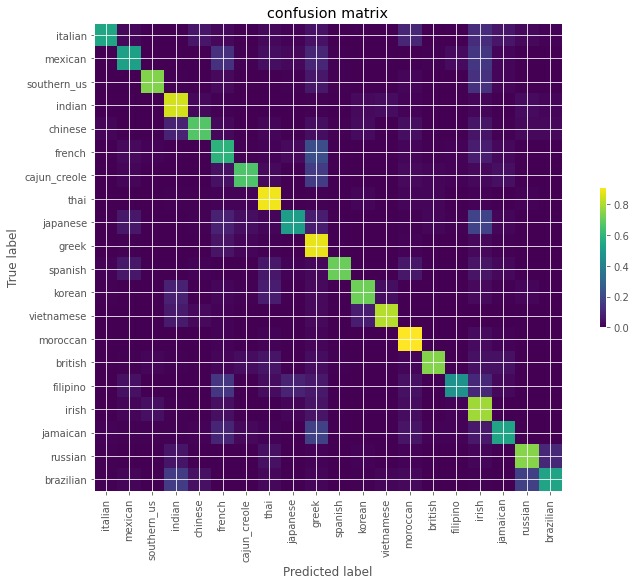

In [31]:
cm = confusion_matrix(y_test, lr.predict(x_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm_normalized, interpolation='nearest')
plt.title("confusion matrix")
plt.colorbar(shrink=0.3)
cuisines = df['cuisine'].value_counts().index
tick_marks = np.arange(len(cuisines))
plt.xticks(tick_marks, cuisines, rotation=90)
plt.yticks(tick_marks, cuisines)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [32]:
y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred, target_names=cuisines))

              precision    recall  f1-score   support

     italian       0.78      0.54      0.64       111
     mexican       0.56      0.52      0.54       153
 southern_us       0.83      0.74      0.78       327
      indian       0.81      0.85      0.83       531
     chinese       0.73      0.67      0.70       154
      french       0.57      0.59      0.58       495
cajun_creole       0.76      0.66      0.71       263
        thai       0.84      0.89      0.86       586
    japanese       0.64      0.51      0.57       153
       greek       0.80      0.88      0.84      1553
     spanish       0.88      0.71      0.78       102
      korean       0.83      0.71      0.77       304
  vietnamese       0.77      0.81      0.79       136
    moroccan       0.91      0.91      0.91      1328
     british       0.82      0.74      0.78       171
    filipino       0.66      0.47      0.55        98
       irish       0.70      0.78      0.74       845
    jamaican       0.59    